# Dog breeds analysis

## Data cleaning

In [1]:
#Import libraries for EDA and linear regression analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, f1_score,accuracy_score, classification_report

sns.set()

In [2]:
df=pd.read_csv(r"C:\Users\syuan\Downloads\dog_breeds.csv")

In [3]:
df.head(15)

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"
5,Chihuahua,Mexico,"Black, Brown, Tan, White",6-9,"Brown, Blue",12-20,"Loyal, energetic, confident, sensitive","Dental problems, eye issues, respiratory issues"
6,Boxer,Germany,"Fawn, Brindle",21-25,Brown,10-12,"Loyal, energetic, intelligent, playful, protec...","Hip dysplasia, cancer, heart conditions"
7,Golden Retriever,Scotland,Golden,21-24,Brown,10-12,"Intelligent, friendly, kind, loyal, good-natured","Hip dysplasia, cancer, skin allergies"
8,Pug,China,"Fawn, Black",10-14,Brown,12-15,"Loyal, playful, affectionate, social, charming","Eye problems, respiratory issues, obesity"
9,Rottweiler,Germany,"Black, Tan",22-27,Brown,8-10,"Loyal, protective, confident, strong","Hip dysplasia, cancer, elbow dysplasia"


In [4]:
#Check if there are missing values 
df.describe()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
count,117,117,117,117,117,117,117,117
unique,103,27,69,67,4,15,38,30
top,Australian Shepherd,England,White,10-12,Brown,12-15,"Intelligent, energetic, playful, good-natured","Dental problems, eye issues, skin allergies"
freq,3,24,9,8,108,44,50,59


In [5]:
#Check if there are duplicates
df.duplicated().sum()

0

In [6]:
#Split values in the same field in the column 'Common Health Problems'
array=df['Common Health Problems'].unique()

In [7]:
unique_values=set()

for value in array:
    values=value.split(', ')
    for v in values:
        unique_values.add(v)

print(unique_values)

{'Ear infections', 'heart conditions', 'elbow dysplasia', 'Eye problems', 'Breathing problems', 'pancreatitis', 'hereditary myopathy', 'diabetes', 'Intervertebral disc disease', 'Dental problems', 'ear infections', 'skin allergies', 'cancer', 'Skin allergies', 'respiratory issues', 'eye issues', 'epilepsy', 'hip dysplasia', 'bladder stones', 'eye problems', 'obesity', 'Hip dysplasia'}


In [8]:
#Turn the values into lower case values
lowercase_values=set()

for value in unique_values:
    lowercase_values.add(value.lower())

print(lowercase_values)

{'intervertebral disc disease', 'epilepsy', 'hip dysplasia', 'ear infections', 'hereditary myopathy', 'bladder stones', 'diabetes', 'skin allergies', 'cancer', 'eye problems', 'heart conditions', 'elbow dysplasia', 'obesity', 'respiratory issues', 'breathing problems', 'dental problems', 'eye issues', 'pancreatitis'}


In [9]:
#Create new columns for unique values in 'Common Health Problems'

df['Common Health Problems']=df['Common Health Problems'].str.lower()

for value in lowercase_values:
    df[value]=df['Common Health Problems'].apply(lambda x:1 if value in x else 0)


In [10]:
df=df.drop(columns=['Common Health Problems'])
df.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,intervertebral disc disease,epilepsy,hip dysplasia,...,cancer,eye problems,heart conditions,elbow dysplasia,obesity,respiratory issues,breathing problems,dental problems,eye issues,pancreatitis
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...",0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...",0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave",0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic",0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured",0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Split values in the same field in the column 'Character Traits'

character=df['Character Traits'].unique()
character

array(['Loyal, friendly, intelligent, energetic, good-natured',
       'Loyal, intelligent, protective, confident, trainable',
       'Loyal, calm, gentle, brave',
       'Intelligent, active, affectionate, hypoallergenic',
       'Curious, friendly, energetic, good-natured',
       'Loyal, energetic, confident, sensitive',
       'Loyal, energetic, intelligent, playful, protective',
       'Intelligent, friendly, kind, loyal, good-natured',
       'Loyal, playful, affectionate, social, charming',
       'Loyal, protective, confident, strong',
       'Independent, energetic, intelligent, playful, strong',
       'Loyal, energetic, playful, curious',
       'Affectionate, playful, confident, good-natured',
       'Playful, affectionate, intelligent, social',
       'Intelligent, energetic, loyal, trainable',
       'Affectionate, patient, gentle, good-natured',
       'Affectionate, intelligent, energetic, good-natured',
       'Affectionate, playful, good-natured',
       'Playful, ene

In [12]:
unique_character=set()

for char in character:
    chars=char.split(', ')
    for c in chars:
        unique_character.add(c)

In [13]:
print(unique_character)

{'friendly', 'gentle', 'active', 'athletic', 'independent', 'Curious', 'brave', 'Playful', 'loyal', 'sensitive', 'hypoallergenic', 'patient', 'Energetic', 'protective', 'affectionate', 'playful', 'energetic', 'Loyal', 'Affectionate', 'Independent', 'good-natured', 'intelligent', 'charming', 'calm', 'social', 'trainable', 'Gentle', 'curious', 'confident', 'Intelligent', 'strong', 'kind'}


In [14]:
lower_character=set()

for char in unique_character:
    lower_character.add(char.lower())

In [15]:
print(lower_character)

{'friendly', 'gentle', 'active', 'athletic', 'kind', 'independent', 'brave', 'loyal', 'sensitive', 'hypoallergenic', 'protective', 'affectionate', 'playful', 'energetic', 'good-natured', 'intelligent', 'charming', 'calm', 'social', 'trainable', 'curious', 'confident', 'strong', 'patient'}


In [16]:
df['Character Traits']=df['Character Traits'].str.lower()

In [17]:
for value in lower_character:
    df[value]=df['Character Traits'].apply(lambda x:1 if value in x else 0)

In [18]:
df=df.drop(columns=['Character Traits'])

In [19]:
df.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),intervertebral disc disease,epilepsy,hip dysplasia,ear infections,...,good-natured,intelligent,charming,calm,social,trainable,curious,confident,strong,patient
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,Bulldog,England,"White, Red",12-16,Brown,8-10,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,0,1,1,1,...,1,0,0,0,0,0,1,0,0,0


In [20]:
df['eye_related problems']=df['eye issues']+df['eye problems']

In [21]:
df = df.drop(columns=['eye issues', 'eye problems'])

In [22]:
df.describe()

,intervertebral disc disease,epilepsy,hip dysplasia,ear infections,hereditary myopathy,bladder stones,diabetes,skin allergies,cancer,heart conditions,...,intelligent,charming,calm,social,trainable,curious,confident,strong,patient,eye_related problems
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.00000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.008547,0.051282,0.350427,0.034188,0.008547,0.051282,0.025641,0.65812,0.145299,0.076923,...,0.914530,0.008547,0.008547,0.017094,0.017094,0.017094,0.034188,0.017094,0.008547,0.735043
std,0.092450,0.221521,0.479156,0.182493,0.092450,0.221521,0.158742,0.47638,0.353918,0.267615,...,0.280782,0.092450,0.092450,0.130179,0.130179,0.130179,0.182493,0.130179,0.092450,0.443209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Create a new column'mean_height'
df[['min_height','max_height']]=df['Height (in)'].str.split('-',expand=True)

In [24]:
df[['min_height','max_height']]=df[['min_height','max_height']].apply(pd.to_numeric)

In [25]:
df['mean_height']=round((df['min_height']+df['max_height'])/2,0)

In [26]:
df.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),intervertebral disc disease,epilepsy,hip dysplasia,ear infections,...,social,trainable,curious,confident,strong,patient,eye_related problems,min_height,max_height,mean_height
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,0,0,1,1,...,0,0,0,0,0,0,0,21,24,22.0
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,0,0,1,0,...,0,1,0,1,0,0,0,22,26,24.0
2,Bulldog,England,"White, Red",12-16,Brown,8-10,0,0,0,0,...,0,0,0,0,0,0,0,12,16,14.0
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,0,1,1,0,...,0,0,0,0,0,0,0,10,15,12.0
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,0,1,1,1,...,0,0,1,0,0,0,0,13,15,14.0


In [27]:
df = df.drop(columns=['Height (in)', 'min_height','max_height'])

In [28]:
#Create a new column'avg_longevity'
df[['min_year','max_year']]=df['Longevity (yrs)'].str.split('-',expand=True)

In [29]:
df[['min_year','max_year']]=df[['min_year','max_year']].apply(pd.to_numeric)

In [30]:
df['avg_longevity']=round((df['min_year']+df['max_year'])/2,0)

In [31]:
df = df.drop(columns=['Longevity (yrs)', 'min_year','max_year'])

In [32]:
df.head()

,Breed,Country of Origin,Fur Color,Color of Eyes,intervertebral disc disease,epilepsy,hip dysplasia,ear infections,hereditary myopathy,bladder stones,...,calm,social,trainable,curious,confident,strong,patient,eye_related problems,mean_height,avg_longevity
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",Brown,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,22.0,11.0
1,German Shepherd,Germany,"Black, Tan",Brown,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,24.0,8.0
2,Bulldog,England,"White, Red",Brown,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,14.0,9.0
3,Poodle,France,"White, Black, Brown, Apricot","Brown, Blue",0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,12.0,14.0
4,Beagle,England,"White, Tan, Red, Lemon",Brown,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,14.0,14.0


## 1)What are the health problems most dogs have?

In [33]:
describe_subset=df[['cancer','eye_related problems','breathing problems','pancreatitis','intervertebral disc disease', 'respiratory issues','elbow dysplasia', 'heart conditions', 'dental problems', 'bladder stones', 'epilepsy', 'ear infections','diabetes', 'obesity', 'hip dysplasia', 'skin allergies', 'hereditary myopathy']].describe()
describe_subset

,cancer,eye_related problems,breathing problems,pancreatitis,intervertebral disc disease,respiratory issues,elbow dysplasia,heart conditions,dental problems,bladder stones,epilepsy,ear infections,diabetes,obesity,hip dysplasia,skin allergies,hereditary myopathy
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.00000,117.000000
mean,0.145299,0.735043,0.008547,0.025641,0.008547,0.068376,0.017094,0.076923,0.692308,0.051282,0.051282,0.034188,0.025641,0.042735,0.350427,0.65812,0.008547
std,0.353918,0.443209,0.092450,0.158742,0.092450,0.253476,0.130179,0.267615,0.463524,0.221521,0.221521,0.182493,0.158742,0.203129,0.479156,0.47638,0.092450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


From the table above ,we can see the top 3 health problems most dogs have are eye problems,dental problems and skin allergies.

## 2)What is the average longevity and height dogs originating from different countries have?

In [34]:
long_by_origin=df.groupby(by='Country of Origin')['avg_longevity'].mean().reset_index()
long_by_origin.sort_values(by='avg_longevity',ascending=False)

,Country of Origin,avg_longevity
16,Mexico,15.000000
0,Africa,14.000000
23,Tibet,14.000000
18,Netherlands,14.000000
5,Congo,14.000000
7,Finland,14.000000
1,Australia,13.555556
15,Malta,13.500000
26,Wales,13.500000
4,China,13.500000


In [35]:
height_by_origin=df.groupby(by='Country of Origin')['mean_height'].mean().reset_index()
height_by_origin.sort_values(by='mean_height',ascending=False)

,Country of Origin,mean_height
22,Switzerland,28.000000
24,Turkey,28.000000
17,Middle East,26.000000
19,Rhodesia,26.000000
11,Ireland,24.571429
3,Canada,24.500000
10,Hungary,24.500000
20,Russia,24.000000
0,Africa,24.000000
25,United States,20.800000


<Axes: xlabel='avg_longevity', ylabel='mean_height'>

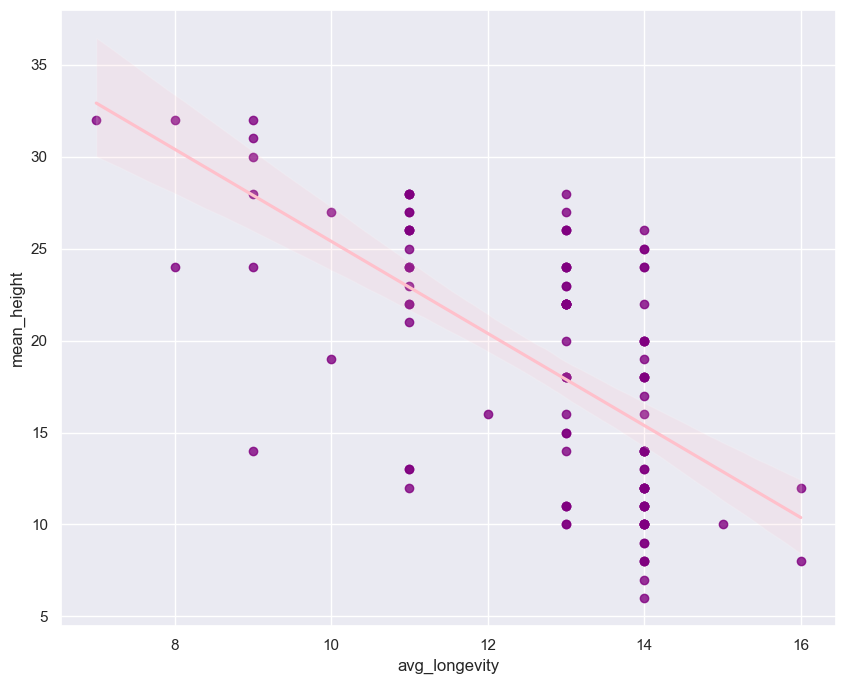

In [36]:
plt.figure(figsize=(10,8))

sns.regplot(x=df['avg_longevity'], 
            y=df['mean_height'], 
            scatter_kws={"color":"purple"}, 
            line_kws={"color":"pink"})

In [37]:
np.corrcoef(df['mean_height'], df['avg_longevity'])

array([[ 1.        , -0.63133231],
       [-0.63133231,  1.        ]])

Height and Logevity are negatively correlated.The bigger the dog ,the shorter it lives.

## 3)What character traits are most dogs described to have?

In [38]:
characters=df[['patient', 'strong', 'protective', 'brave', 'good-natured', 'charming', 'confident', 'calm', 'playful', 'energetic', 'hypoallergenic', 'loyal', 'trainable', 'curious', 'gentle', 'athletic', 'social', 'friendly', 'sensitive', 'affectionate', 'intelligent', 'independent', 'active', 'kind']]
pd.set_option('display.max_columns', None)
characters.describe()

,patient,strong,protective,brave,good-natured,charming,confident,calm,playful,energetic,hypoallergenic,loyal,trainable,curious,gentle,athletic,social,friendly,sensitive,affectionate,intelligent,independent,active,kind
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.008547,0.017094,0.076923,0.008547,0.846154,0.008547,0.034188,0.008547,0.495726,0.769231,0.034188,0.367521,0.017094,0.017094,0.102564,0.017094,0.017094,0.025641,0.017094,0.162393,0.914530,0.034188,0.034188,0.008547
std,0.092450,0.130179,0.267615,0.092450,0.362353,0.092450,0.182493,0.092450,0.502132,0.423137,0.182493,0.484204,0.130179,0.130179,0.304694,0.130179,0.130179,0.158742,0.130179,0.370397,0.280782,0.182493,0.182493,0.092450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Among 24 characteristics,most dog are described to be intelligent ,good_natured and energetic.

## 4)How are dogs' characteristics correlated with longevity?

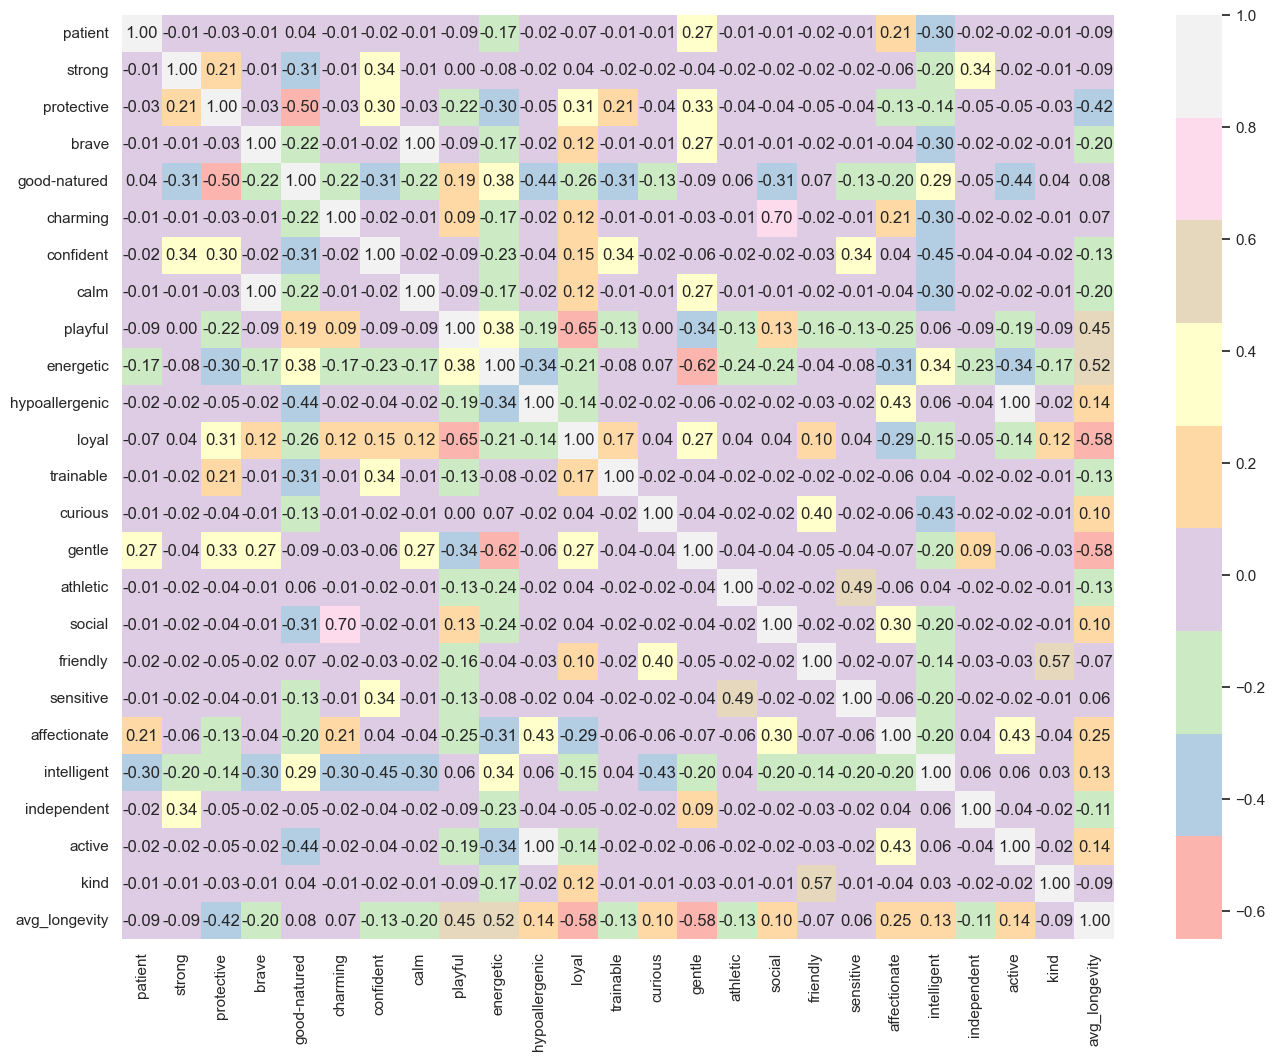

In [39]:
correlation_matrix = df[['patient', 'strong', 'protective', 'brave', 'good-natured', 'charming', 'confident', 'calm', 'playful', 'energetic', 'hypoallergenic', 'loyal', 'trainable', 'curious', 'gentle', 'athletic', 'social', 'friendly', 'sensitive', 'affectionate', 'intelligent', 'independent', 'active', 'kind','avg_longevity']].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.show()

From the heatmap we see that average life span is most positively correlated with dogs being playful and energetic while most negatively correlated with dogs being loyal and gentle.However,the correlations are not strong.

## 5)How are dogs' characteristics correlated with height?

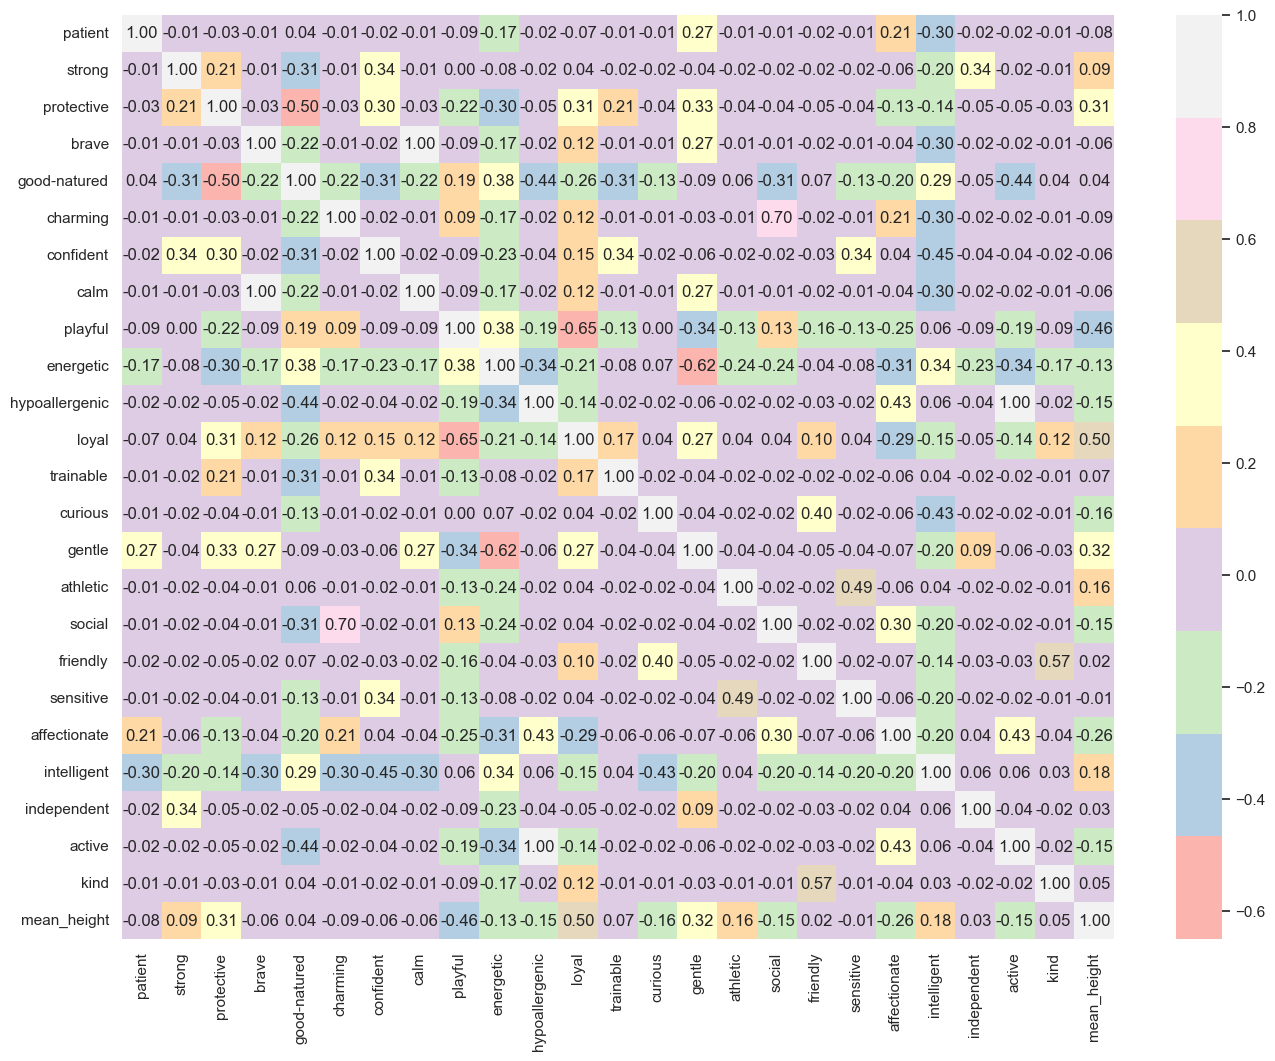

In [40]:
correlation_matrix = df[['patient', 'strong', 'protective', 'brave', 'good-natured', 'charming', 'confident', 'calm', 'playful', 'energetic', 'hypoallergenic', 'loyal', 'trainable', 'curious', 'gentle', 'athletic', 'social', 'friendly', 'sensitive', 'affectionate', 'intelligent', 'independent', 'active', 'kind','mean_height']].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.show()

Bigger dogs seem more loyal,protective and gentle while less palyful and affectionate.However,the correlations are not strong.

## 6)How are dogs' health problems correlated with height?

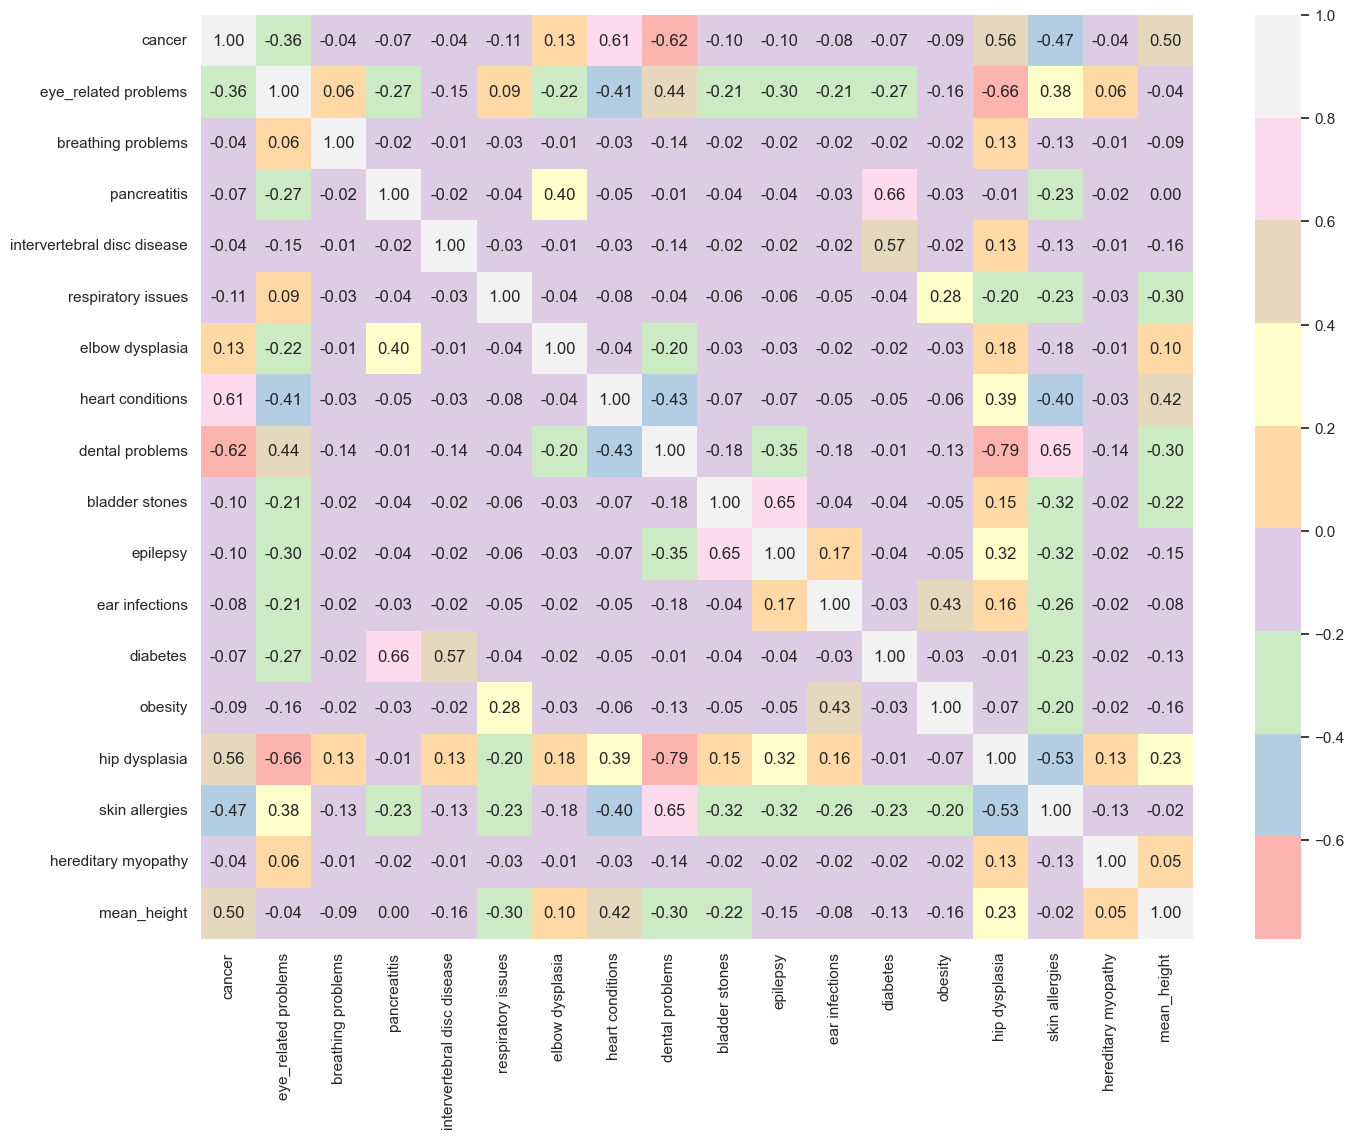

In [41]:
correlation_matrix =df[['cancer','eye_related problems','breathing problems','pancreatitis','intervertebral disc disease', 'respiratory issues','elbow dysplasia', 'heart conditions', 'dental problems', 'bladder stones', 'epilepsy', 'ear infections','diabetes', 'obesity', 'hip dysplasia', 'skin allergies', 'hereditary myopathy','mean_height']].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.show()

Bigger dogs are more prone to cancer and heart conditions while less prone to respiratory issues and dental problems.However,the correlations are not strong.

## 7)Are dogs from a certain country prone to a certain health problem?

In [42]:
cancer_by_country = df[df['cancer'] == 1].groupby(by='Country of Origin')['cancer'].count().reset_index(name='count')

cancer_by_country.sort_values(by='count',ascending=False)

,Country of Origin,count
3,Germany,5
1,England,3
6,Scotland,3
4,Ireland,2
0,Canada,1
2,France,1
5,Rhodesia,1
7,Switzerland,1


In [43]:
health_problem_by_country=df.groupby(by='Country of Origin')[['cancer','eye_related problems','breathing problems','pancreatitis','intervertebral disc disease', 'respiratory issues','elbow dysplasia', 'heart conditions', 'dental problems', 'bladder stones', 'epilepsy', 'ear infections','diabetes', 'obesity', 'hip dysplasia', 'skin allergies', 'hereditary myopathy']].mean().idxmax(axis=0)
health_problem_by_country

cancer                            Rhodesia
eye_related problems                Africa
breathing problems                  France
pancreatitis                       Germany
intervertebral disc disease        Germany
respiratory issues                   China
elbow dysplasia                    Germany
heart conditions               Switzerland
dental problems                     Africa
bladder stones                      France
epilepsy                            France
ear infections                      Canada
diabetes                           Germany
obesity                             Canada
hip dysplasia                       Canada
skin allergies                      Africa
hereditary myopathy                 Russia
dtype: object

Dogs from  Germany seem prone to pancreatitis and IVDD.

Dogs from  Africa seem prone to eye problems,dental problems and skin allergies.

Dogs from France seem prone to breathing problems,bladder stones and epilepsy.

Dogs from Rhodesia seem prone to cancer.


Dogs from China seem prone to respiratory issues.

Dogs from Switzerland seem prone to heart conditions.

Dogs from Canada seem prone to ear infections,obesity and hip dysplasia.


Dogs from Russia seem prone to hereditary myopathy.

## 8)Can common health problems most dogs have be predicted by heights?

In [44]:
#Because there's an imbalabce in data ,upsampling has to be done before the logistic regression model is deployed.

data_majority = df[df['eye_related problems'] == 1]
data_minority = df[df['eye_related problems'] == 0]
data_minority_upsampled = resample(data_minority,replace=True,n_samples=len(data_majority),random_state=0)
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

X=data_upsampled[['mean_height']]
y=data_upsampled['eye_related problems']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.5428571428571428
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.41      0.47        17
           1       0.55      0.67      0.60        18

    accuracy                           0.54        35
   macro avg       0.54      0.54      0.53        35
weighted avg       0.54      0.54      0.54        35



In [45]:
#Because there's an imbalabce in data classes ,upsampling has to be done before the logistic regression model is deployed.

data_majority = df[df['skin allergies'] == 1]
data_minority = df[df['skin allergies'] == 0]
data_minority_upsampled = resample(data_minority,replace=True,n_samples=len(data_majority),random_state=0)
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

X=data_upsampled[['mean_height']]
y=data_upsampled['skin allergies']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.5161290322580645
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.50      0.60      0.55        15

    accuracy                           0.52        31
   macro avg       0.52      0.52      0.51        31
weighted avg       0.52      0.52      0.51        31



In [46]:
#Because there's an imbalabce in data classes ,upsampling has to be done before the logistic regression model is deployed.

data_majority = df[df['dental problems'] == 1]
data_minority = df[df['dental problems'] == 0]
data_minority_upsampled = resample(data_minority,replace=True,n_samples=len(data_majority),random_state=0)
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

X=data_upsampled[['mean_height']]
y=data_upsampled['dental problems']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.71      0.59      0.65        17

    accuracy                           0.67        33
   macro avg       0.67      0.67      0.67        33
weighted avg       0.67      0.67      0.66        33



With model accuracy of 0.54,0.51 and 0.66 respectively,logistic regression seems able to predict only dental problems.

In [47]:
#Try using random forest model to predict

X=data_upsampled[['mean_height']]
y=data_upsampled['eye_related problems']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.6363636363636364
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.68      0.86      0.76        22

    accuracy                           0.64        33
   macro avg       0.54      0.52      0.51        33
weighted avg       0.59      0.64      0.59        33



In [48]:
#Try using random forest model to predict
X=data_upsampled[['mean_height']]
y=data_upsampled['skin allergies']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.48484848484848486
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        15
           1       0.53      0.44      0.48        18

    accuracy                           0.48        33
   macro avg       0.49      0.49      0.48        33
weighted avg       0.49      0.48      0.48        33



In [49]:
#Try using random forest model to predict
X=data_upsampled[['mean_height']]
y=data_upsampled['dental problems']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.6060606060606061
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.70      0.41      0.52        17

    accuracy                           0.61        33
   macro avg       0.63      0.61      0.59        33
weighted avg       0.63      0.61      0.59        33



With model accuracy of 0.64,0.49,0.6 respectively,random forest models don't seem able to predict well either.The reasons may be the dataset is not big enough to well train the model and one factor alone is not sufficient to accurately predict whether a dog get a certain problem.

In [50]:
df.to_csv(r"C:\Users\syuan\Downloads\dog_breeds_cleaned.csv")